# Decision Tree Classification

## Importing the libraries

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import plotly.graph_objects as go
from sklearn.metrics import plot_confusion_matrix

## Importing the dataset

In [111]:
#Reading the H5 file
filename = "sensors_data_augmented.h5"
h5f = h5py.File(filename,'r')
sensors_data = h5f['dataset_1'][:]
h5f.close()
#The H5 file contains also the information of a temperature sensor, that you can discard
sensors_data_final = sensors_data[:,[1,2,3,4,5,6],:]#Not using temperature 

In [112]:
with open('binary_labels_augmented.txt') as f:
    lines = f.readlines()

In [113]:
X = sensors_data_final
y = lines

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [115]:
df = pd.DataFrame([list(l) for l in X]).stack().apply(pd.Series).reset_index(1, drop=True)
df.index.name = 'Date'
df.columns = [str(i) for i in range(1,301)]
df_half = df[[str(i) for i in range(1,181)]]
print(df_half)

        1    2     3     4     5      6      7      8      9     10  ...  \
Date                                                                 ...   
0     4.0  0.0   0.0   3.0   4.0    3.0    7.0    8.0    7.0    9.0  ...   
0     4.0  1.0   0.0   3.0   3.0    1.0    4.0    6.0    1.0    3.0  ...   
0     5.0  0.0   0.0   4.0   4.0    0.0    5.0    6.0    0.0    0.0  ...   
0     0.0  1.0  15.0  47.0  83.0  116.0  151.0  179.0  200.0  221.0  ...   
0     5.0  0.0   0.0   4.0   4.0    0.0    4.0    5.0    1.0    1.0  ...   
...   ...  ...   ...   ...   ...    ...    ...    ...    ...    ...  ...   
419   0.0  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    2.0  ...   
419   0.0  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    1.6  ...   
419   0.0  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.9  ...   
419   0.0  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    1.9  ...   
419   0.0  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    2.0  ...   

       171 

In [116]:
df = pd.DataFrame([list(l) for l in X]).stack().apply(pd.Series).reset_index(1, drop=True)
df.index.name = 'Date'
df_half = df[[str(i) for i in range(1,181)]]
print(df_half)
x = []
for i in range(len(X)):
    x.append(df_half.loc[i].to_numpy())
X = x
X = np.array(X)
X.shape

In [117]:
len(x[2][0])

180

In [118]:
time = [i for i in range(0,300)]
len(time)

300

In [119]:
fig = go.Figure()
for i in range(0,len(X[0])):
    A = X[0][i].tolist()
    fig.add_trace(go.Scatter(x=time, y=A,
                    mode='lines',
                    name='sensor'+str(i+1),
                         line=dict(width=1)))
fig.update_layout(title='Sensors reactions over time',
                   xaxis_title='Time',
                   yaxis_title='Six chemical sensors')
fig.show()

In [120]:
X = x
X = np.array(X)
X.shape

(420, 6, 180)

## Splitting the dataset into the Training set and Test set

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [122]:
print(X_train)

[[[ 3.   1.   1.  ...  6.   5.   6. ]
  [ 4.   3.   2.  ...  4.   3.   4. ]
  [ 3.   3.   0.  ...  2.   2.   2. ]
  [ 3.   1.   0.  ... 60.  60.  60. ]
  [ 3.   3.   1.  ...  2.   2.   1. ]
  [ 3.   2.   2.  ...  5.   4.   5. ]]

 [[ 9.  12.  14.  ...  7.   7.   6. ]
  [ 4.   3.   4.  ...  6.   5.   5. ]
  [ 6.   5.   6.  ...  4.   4.   3. ]
  [ 0.   1.   1.  ... 53.  53.  53. ]
  [ 6.   5.   5.  ...  3.   3.   2. ]
  [ 3.   2.   3.  ...  5.   6.   5. ]]

 [[ 0.   0.   0.  ...  2.4  2.   1.8]
  [ 0.   0.   0.  ...  3.8  3.6  3.4]
  [ 0.   0.   0.  ...  2.6  2.6  2.6]
  [ 0.   0.   0.  ... 17.4 17.  16.6]
  [ 0.   0.   0.  ...  3.   3.   3. ]
  [ 0.   0.   0.  ...  2.8  2.8  3. ]]

 ...

 [[ 6.   7.  11.  ...  5.   5.   5. ]
  [ 5.   5.   5.  ...  1.   4.   3. ]
  [ 4.   4.   4.  ...  1.   2.   2. ]
  [ 1.   0.   1.  ... 22.  22.  22. ]
  [ 5.   4.   4.  ...  3.   2.   1. ]
  [ 4.   5.   4.  ...  3.   3.   2. ]]

 [[ 0.   0.   0.  ...  9.3  9.2  9. ]
  [ 0.   0.   0.  ...  5.7  5.7  5.7

In [123]:
print(y_train)

[1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0]


In [124]:
print(X_test)

[[[ 0.   0.   0.  ...  5.8  5.6  5.4]
  [ 0.   0.   0.  ...  3.2  3.   3. ]
  [ 0.   0.   0.  ...  1.4  1.2  1.4]
  [ 0.   0.   0.  ... 23.4 22.8 22.2]
  [ 0.   0.   0.  ...  1.4  1.2  1. ]
  [ 0.   0.   0.  ...  3.6  3.4  3.4]]

 [[ 0.   0.   0.  ...  6.1  6.1  6. ]
  [ 0.   0.   0.  ...  4.5  4.4  4.3]
  [ 0.   0.   0.  ...  5.   4.9  4.8]
  [ 0.   0.   0.  ...  8.4  8.2  7.8]
  [ 0.   0.   0.  ...  3.9  3.8  3.7]
  [ 0.   0.   0.  ...  5.3  5.   5. ]]

 [[ 1.   0.   2.  ... 24.  25.  25. ]
  [ 1.   0.   2.  ... 31.  32.  32. ]
  [ 5.   4.   6.  ...  6.   6.   7. ]
  [ 0.   4.  27.  ... 71.  71.  70. ]
  [ 3.   2.   3.  ...  7.   7.   8. ]
  [ 0.   0.   2.  ... 28.  28.  29. ]]

 ...

 [[ 1.   1.   1.  ...  7.   6.   6. ]
  [ 3.   2.   3.  ...  3.   3.   2. ]
  [ 7.   8.   6.  ...  3.   2.   3. ]
  [ 0.   0.   1.  ... 57.  57.  56. ]
  [ 5.   6.   6.  ...  2.   2.   3. ]
  [ 4.   4.   4.  ...  3.   4.   4. ]]

 [[ 0.   0.   0.  ...  4.   4.   4. ]
  [ 0.   0.   0.  ...  3.   3.   3. 

In [125]:
print(y_test)

[0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1]


## Feature Scaling

In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in range(len(X_train)):
    X_train[i] = sc.fit_transform(X_train[i])
print(X_train[0])
for i in range(len(X_test)):
    X_test[i] = sc.transform(X_test[i])
from sklearn import preprocessing
for i in range(len(X_train)):
    X_train[i] = preprocessing.normalize(X_train[i])
#print(X_train)
for i in range(len(X_test)):
    X_test[i] = preprocessing.normalize(X_test[i])
fig = go.Figure()
for i in range(0,len(X_train[0])):
    A = X_train[0][i].tolist()
    fig.add_trace(go.Scatter(x=time, y=A,
                    mode='lines',
                    name='sensor'+str(i),
                         line=dict(width=1)))
fig.show()

[[-0.4472136  -1.29986737  0.         ... -0.3413451  -0.36172287
  -0.33195618]
 [ 2.23606798  0.92847669  1.22474487 ... -0.4366042  -0.45608536
  -0.4268008 ]
 [-0.4472136   0.92847669 -1.22474487 ... -0.5318633  -0.5032666
  -0.52164542]
 [-0.4472136  -1.29986737 -1.22474487 ...  2.23065055  2.23324553
   2.22884861]
 [-0.4472136   0.92847669  0.         ... -0.5318633  -0.5032666
  -0.56906773]
 [-0.4472136  -0.18569534  1.22474487 ... -0.38897465 -0.40890411
  -0.37937849]]


In [127]:
X_train

array([[[-0.07512452, -0.2183563 ,  0.        , ..., -0.05734035,
         -0.06076348, -0.05576317],
        [ 0.33054304,  0.13725053,  0.18104588, ..., -0.06454029,
         -0.06742006, -0.06309112],
        [-0.06805792,  0.14129756, -0.18638428, ..., -0.08094009,
         -0.07658818, -0.07938511],
        [-0.01510861, -0.04391457, -0.04137664, ...,  0.07536004,
          0.0754477 ,  0.07529916],
        [-0.06537183,  0.13572087,  0.        , ..., -0.07774557,
         -0.07356542, -0.08318396],
        [-0.078248  , -0.03249071,  0.21429096, ..., -0.06805805,
         -0.07154507, -0.06637903]],

       [[ 0.18647606,  0.24688948,  0.24978734, ..., -0.04043497,
         -0.04043497, -0.04197678],
        [-0.0365887 , -0.07156277, -0.0562186 , ..., -0.06016461,
         -0.06875956, -0.06198912],
        [ 0.06499326,  0.01271184,  0.01664371, ..., -0.0687032 ,
         -0.0687032 , -0.07007162],
        [-0.05835206, -0.03586914, -0.03842487, ...,  0.07832751,
          0.07

In [128]:
X_train

array([[[-0.07512452, -0.2183563 ,  0.        , ..., -0.05734035,
         -0.06076348, -0.05576317],
        [ 0.33054304,  0.13725053,  0.18104588, ..., -0.06454029,
         -0.06742006, -0.06309112],
        [-0.06805792,  0.14129756, -0.18638428, ..., -0.08094009,
         -0.07658818, -0.07938511],
        [-0.01510861, -0.04391457, -0.04137664, ...,  0.07536004,
          0.0754477 ,  0.07529916],
        [-0.06537183,  0.13572087,  0.        , ..., -0.07774557,
         -0.07356542, -0.08318396],
        [-0.078248  , -0.03249071,  0.21429096, ..., -0.06805805,
         -0.07154507, -0.06637903]],

       [[ 0.18647606,  0.24688948,  0.24978734, ..., -0.04043497,
         -0.04043497, -0.04197678],
        [-0.0365887 , -0.07156277, -0.0562186 , ..., -0.06016461,
         -0.06875956, -0.06198912],
        [ 0.06499326,  0.01271184,  0.01664371, ..., -0.0687032 ,
         -0.0687032 , -0.07007162],
        [-0.05835206, -0.03586914, -0.03842487, ...,  0.07832751,
          0.07

## Training the Decision Tree Classification model on the Training set

In [129]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [131]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(d2_train_dataset, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [132]:
nsamples, nx, ny = X_test.shape
X_test_resh = X_test.reshape((nsamples,nx*ny))
y_pred = classifier.predict(X_test_resh)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]]


## Making the Confusion Matrix

[[19 40]
 [14 32]]
0.4857142857142857
              precision    recall  f1-score   support

           0       0.58      0.32      0.41        59
           1       0.44      0.70      0.54        46

    accuracy                           0.49       105
   macro avg       0.51      0.51      0.48       105
weighted avg       0.52      0.49      0.47       105



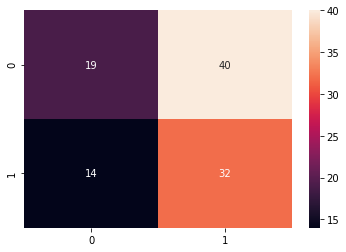

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
import seaborn as sns
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## Random forest

[[0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]]
[[41 18]
 [27 19]]
0.5714285714285714
              precision    recall  f1-score   support

           0       0.60      0.69      0.65        59
           1       0.51      0.41      0.46        46

    accuracy                           0.57       105
   macro

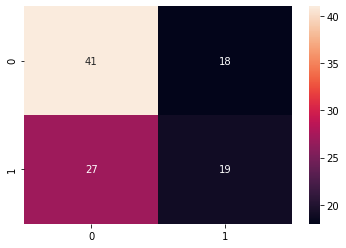

In [134]:
nsamples, nx, ny = X_test.shape
X_test_resh = X_test.reshape((nsamples,nx*ny))
from sklearn.ensemble import RandomForestClassifier
classifierrand = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifierrand.fit(d2_train_dataset, y_train)
y_pred = classifierrand.predict(X_test_resh)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## KNN

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]]
[[50  9]
 [38  8]]
0.5523809523809524
              precision    recall  f1-score   support

           0       0.57      0.85      0.68        59
           1       0.47      0.17      0.25        46

    accuracy                           0.55       105
   macro

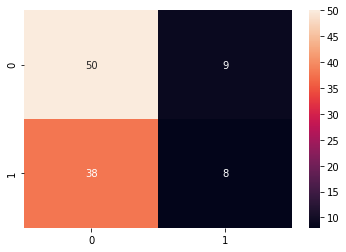

In [139]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski')
knn.fit(d2_train_dataset, y_train)
y_pred = knn.predict(X_test_resh)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## Linear SVM

[[1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]]
[[19 40]
 [14 32]]
0.4857142857142857
              precision    recall  f1-score   support

           0       0.58      0.32      0.41        59
           1       0.44      0.70      0.54        46

    accuracy                           0.49       105
   macro

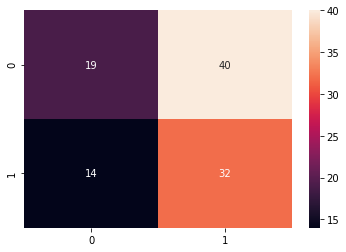

In [140]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(d2_train_dataset, y_train)
y_pred = classifier.predict(X_test_resh)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))